In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Understanding

#### What is rain?
Rain is liquid water in the form of droplets that have condensed from atmospheric water vapor and then become heavy enough to fall under gravity. Rain is a major component of the water cycle and is responsible for depositing most of the fresh water on the Earth. It provides suitable conditions for many types of ecosystems, as well as water for hydroelectric power plants and crop irrigation.

#### What causes rain?
Clouds are made of water droplets. Within a cloud, water droplets condense onto one another, causing the droplets to grow. When these water droplets get too heavy to stay suspended in the cloud, they fall to Earth as rain.

#### Hidrology Cycle
1. Due to the heat of the sun, *evaporation* occurs in rivers & sea and *transpiration* from plant surfaces and evaporation from the soil surface.
2. This water vapor is transported by moving air. On a certain height, the water vapor will be condensed to form clouds. with natural conditions that allow, such as the lowering *temperature*, the cloud will condense into water droplets which then become rain/*precipitation*.
3. Rainwater that falls on the ground will flow as surface flow or overland flow or surface runoff while others will seep into the ground/*infiltration*.

##### Hydrology process
Complete explanation of what the hydrological cycle, short while, and long ranging from, sense , process the types of, and the order siklusnya., for all of us water is a source of life., well own water comes from the earth in circulation or have and that it is said with. hydrological cycle

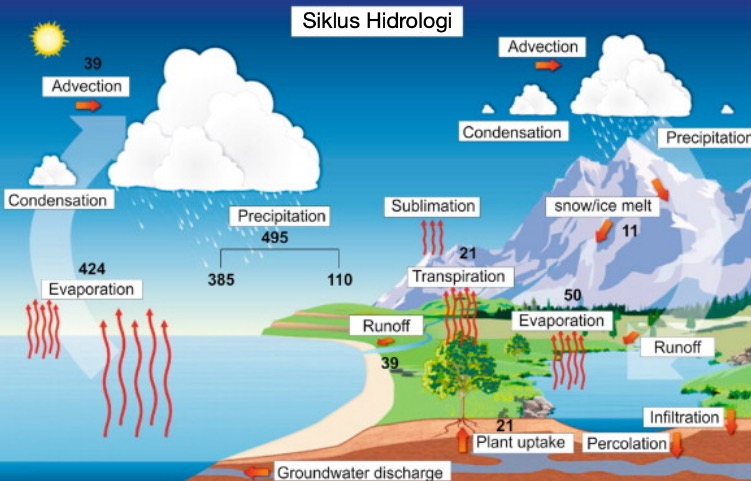

Hydrological cycles are stages that occur in aquatic environments (such as seas, lakes, rivers, soils, and atmospheres). This cycle will continue to be sustainable until the availability of water in the earth never runs out.

The sequences of hydrological cycles in the process, where water from the atmosphere descends to earth in the form of rain and also snow will return to the atmosphere repeatedly and continuously.

#### Columns Description

1. Date, The date of observation 
2. Location, The common name of the location of the weather station
3. MinTemp, The minimum temperature in degrees celsius
4. MaxTemp, The maximum temperature in degrees celsius
5. Rainfall, The amount of rainfall recorded for the day in mm
6. Evaporation, The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7. Sunshine, The number of hours of bright sunshine in the day.
8. WindGustDir, The direction of the strongest wind gust in the 24 hours to midnight
9. WindGustSpeed, The speed (km/h) of the strongest wind gust in the 24 hours to midnight
10. WindDir9am, Direction of the wind at 9am
11. WindDir3pm, Direction of the wind at 3pm
12. WindSpeed9am, Wind speed (km/hr) averaged over 10 minutes prior to 9am
13. WindSpeed3pm, Wind speed (km/hr) averaged over 10 minutes prior to 3pm
14. Humidity9am, Humidity (percent) at 9am
15. Humidity3pm, Humidity (percent) at 3pm
16. Pressure9am, Atmospheric pressure (hpa) reduced to mean sea level at 9am
17. Pressure3pm, Atmospheric pressure (hpa) reduced to mean sea level at 3pm
18. Cloud9am, Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
19. Cloud3pm, Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cloud9am for a description of the values
20. Temp9am, Temperature (degrees C) at 9am
21. Temp3pm, Temperature (degrees C) at 3pm
22. RainToday, Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
23. RainTomorrow, The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

In [ ]:
#Import libraries
 
#Data analysis & preprocessing
import pandas as pd
import numpy as np 
 
#Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#Assigning dataset to table
df=pd.read_csv('/content/drive/MyDrive/Dataset (1)/weatherAUS.csv')

In [ ]:
#Showring 5 rows of the dataset
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [ ]:
#Converting the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date'])

#Showing 3 rows of the dataset
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


Numerical
- Continuous : MinTemp, MaxTemp, Rainfall,	Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am	Humidity3pm, Pressure9am,	Pressure3pm,	Temp9am,	Temp3pm	
- Discrete : Cloud9am,	Cloud3pm

Catgeorical
- Ordinal : Date, 
- Nominal : Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow

From those columns, notice that some value are missing in the Evaporation, Sunshine and other columns. So we investigate further for the missing value in the dataset.

In [ ]:
#Showing the general info of the data
print('General info of the data : ')
print(df.info())

General info of the data : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 no

In [ ]:
#Showing the NaN value of the data
print('Showing the NaN value of the data : ')
print(df.isnull().sum())

Showing the NaN value of the data : 
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [ ]:
#Showing the percentage of the NaN value 
print('Showing the percentage of the NaN value : ')
print(df.isnull().sum()*100/df.shape[0])

Showing the percentage of the NaN value : 
Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64


The dataset comprises 145460 rows and 23 columns, but there are missing data on all of the columns except Location and Date.

Let's take a look on the overall statistics of each variable.

## Exploratory Data Analysis
In Exploratory Data Analysis, We going to explore deeper into the dataset and find the relation between feature and desired outcome.

In [ ]:
#Changing the RainToday and RainTomorrow Column into boolean in order to make analysis easier
df.loc[df['RainToday']=='No', 'RainToday']=0
df.loc[df['RainToday']=='Yes', 'RainToday']=1
df.loc[df['RainTomorrow']=='No', 'RainTomorrow']=0
df.loc[df['RainTomorrow']=='Yes', 'RainTomorrow']=1

df.RainToday=df.RainToday.astype(float)
df.RainTomorrow=df.RainTomorrow.astype(float)

### Overall Statistics of Each Variable

In [ ]:
#Overall Statistics of Each Variable
print('Oveall Statistics of Each Variable: ')
df.describe(include='all', datetime_is_numeric=True).T

Oveall Statistics of Each Variable: 


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Date,145460,NaN,NaN,NaN,2013-04-04 21:08:51.907077376,2007-11-01 00:00:00,2011-01-11 00:00:00,2013-06-02 00:00:00,2015-06-14 00:00:00,2017-06-25 00:00:00,NaN
Location,145460,49,Canberra,3436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,143975,NaN,NaN,NaN,12.194,-8.5,7.6,12,16.9,33.9,6.39849
MaxTemp,144199,NaN,NaN,NaN,23.2213,-4.8,17.9,22.6,28.2,48.1,7.11905
Rainfall,142199,NaN,NaN,NaN,2.36092,0,0,0,0.8,371,8.47806
Evaporation,82670,NaN,NaN,NaN,5.46823,0,2.6,4.8,7.4,145,4.1937
Sunshine,75625,NaN,NaN,NaN,7.61118,0,4.8,8.4,10.6,14.5,3.78548
WindGustDir,135134,16,W,9915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustSpeed,135197,NaN,NaN,NaN,40.0352,6,31,39,48,135,13.6071
WindDir9am,134894,16,N,11758,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From our observation we can gain some insights such as: 
- From our knowledge of weather, we can make a premilenary hypothesis such as the temperature, pressure, rainfall, and wind speed might have a cyclical pattern throughout the year

- NaN value from all of the columns except Evaporation, Sunshine, Cloud9am and Cloud9pm will be filled with certain values based on each columns criteria.
     - The NaN value of MinTemp, MaxTemp, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, and Temp3pm have relatively small std compare to their mean. Because of that, they will be filled with an average of each column's between 7 days before and 7 days after from the NaN's missing value date with the respective of their location.
     - WindSpeed9am and WindSpeed3pm have relatively big std compare to their mean.Because of that, they will be filled with a median of each column's between 7 days before and 7 days after from the NaN's missing value date with the respective of their location.
     - The NaN value of WindGustDir, WindDir9am and WindDir3pm will be filled with the mode of each column's between 8 days before and 7 days after from the NaN's missing value date with the respective of their location.
     
- Evaporation, Sunshine, Cloud9am and Cloud9pm columns have a lot of missing values with over 38% percent of each column's data is missing. As a result, we may drop the entire column because it can't be a feature in our predictive model.
- RainToday and RainTommorow' missing values will drop per row since we don't want to destroy the authenticity of the data.

In [ ]:
# Making a seperate column for Year, Month, and Day for better analysis
df['Year']=df.Date.dt.year
df['Month']=df.Date.dt.month
df['Day']=df.Date.dt.day
df['Year_Month']=df['Date'].array.strftime('%Y-%m')

### Univariate Analysis

In [ ]:
#Analyzing target values
frequency_target_col=df[['RainTomorrow']].value_counts()
proportion_target_col=df[['RainTomorrow']].value_counts()*100/len(df['RainTomorrow'])

print('The frequency of variable in target columns is : \n',frequency_target_col, '\n')
print('The proportion of variable in target columns is : \n',proportion_target_col)

The frequency of variable in target columns is : 
 RainTomorrow
0.0             110316
1.0              31877
dtype: int64 

The proportion of variable in target columns is : 
 RainTomorrow
0.0             75.839406
1.0             21.914616
dtype: float64


([<matplotlib.patches.Wedge at 0x7f73faa5ced0>,
 [Text(-0.8382813733394672, 0.7122389620851256, '(0.0,)'),
  Text(0.8382813066548392, -0.7122390405706891, '(1.0,)')],
 [Text(-0.45724438545789114, 0.38849397931915935, '77.6%'),
  Text(0.45724434908445766, -0.3884940221294667, '22.4%')])

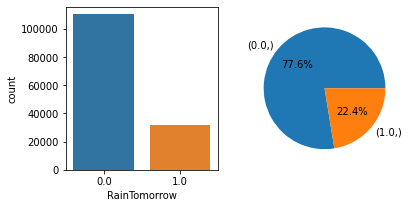

In [ ]:
fig, ax=plt.subplots(figsize=(6, 3), ncols=2)
sns.countplot(x="RainTomorrow", data=df, ax=ax[0])
ax[1].pie(x=proportion_target_col, autopct="%.1f%%", labels=proportion_target_col.index)

The visualization above shows that the "No" variable took over 77,6 % and the "Yes" variable took over 22,4 %. Ketidakseimbangan target kolom akan mempengaruhi model Machine Learning sehingga target kolom dengan variable "Yes" akan diupsample.

In [ ]:
# The probability of raining tomorrow if today is raining
today_and_tomorrow_rain=df[(df.RainToday==1)&(df.RainTomorrow==1)].shape[0]
today_rain=df[(df.RainToday==1)].shape[0]

probability=today_and_tomorrow_rain*100/today_rain
print(f'If today is raining, the probability of raining tomorrow  is : {"%.2f" % probability}%')

If today is raining, the probability of raining tomorrow  is : 45.79%


The "RainToday" feature has a moderate probability on target columns

#### Distributions of each column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73fa558850>,
      dtype=object)

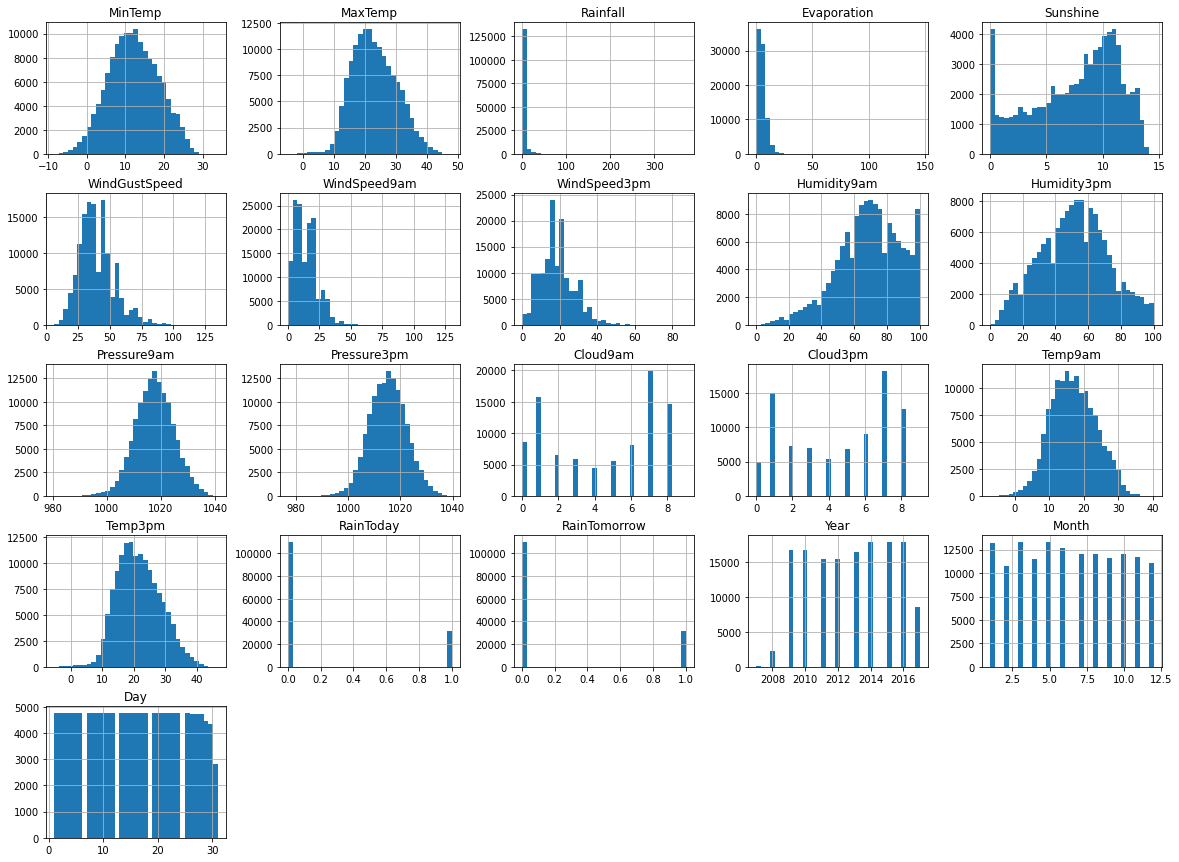

In [ ]:
# Displaying the distribution of each column
df.hist(figsize=(20,15), bins=35)

- Semua kolom Temperature memiliki sedikit skew positif. Ini menandakan bahwa lebih sering muncul hari-hari panas dibandingkan hari-hari yang dingin. Modus dari Temp3pm memiliki nilai yang lebih tinggi daripada Temp9am, hal ini terjadi karena permukaan bumi telah disinari matahari lebih lama pada pada jam 3 sore dibandingkan jam 9 pagi. Semakin lama permukaan bumi disinari matahari maka semakin tinggi pula suhu udaranya.   

- Kolom Humidity9am memiliki skew positif sedangkan Humidity3pm memiliki skew negatif. Ini menandakan bahwa kelembapan cenderung lebih tinggi pada jam 9 pagi kemudian pada jam 3 sore kelembapan menurun. Hal ini terjadi karena kenaikan suhu udara dari jam 9 hingga jam 3 sore. Ketika suhu udara meningkat, udara dapat menahan lebih banyak molekul air, dan kelembaban relatifnya menurun. Ketika suhu turun, kemampuan udara untuk menahan molekul air menurun sehingga kelembaban relatifnya meningkat.

- Kolom Pressure sudah memiliki distribusi yang normal. Pressure9am memiliki nilai modus yang lebih tinggi daripada Pressure3am. Hal ini terjadi karena kenaikan suhu udara dari jam 9 hingga jam 3 sore. Ketika suhu udara meningkat, volume udara semakin membesar sehingga partikel-partikel udara yang bertabrakan per cm^2 makin sedikit yang mengakibatkan tekanan mengecil. Ketika suhu turun, volume udara semakin mengecil  sehingga partikel-partikel udara yang bertabrakan per cm^2 makin banyak yang mengakibatkan tekanan membesar.

- Kita akan menggunakan mengubah distribusi pada kolom-kolom yang memiliki skewness positif dan negatif pada tahap pre-processing sehingga terbentuk normal distribution.

### Bivariate Analysis

#### Overall Correlation of Each Columns

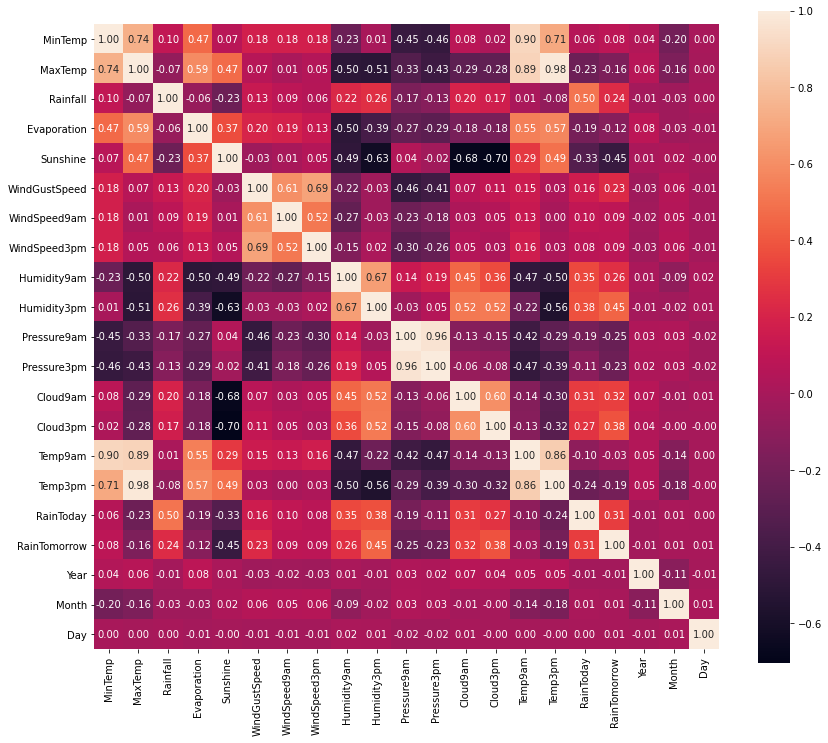

In [ ]:
# Overall Correlation of Each Columns
plt.figure(figsize=(14,12))
ax = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

- Rainfall memiliki korelasi yang sedang terhadap RainTomorrow, yaitu 0.24. Hal ini terjadi karena ketika terjadi hujan dengan curah hujan yang tinggi pada suatu hari, keesokan harinya juga memiliki probabilitas untuk hujan juga.
- Cloud memiliki korelasi terhadap RainTomorrow. Cloud3pm memiliki korelasi 0.38 sedangkan Cloud9am memiliki korelasi 0.32. Hal ini terajadi karena salah satu komponen untuk terjadinya hujan adalah awan. Ketika awan menutupi langit maka ada kemungkinan terjadinya hujan.
- Sunshine memiliki korelasi negatif yang cukup tinggi terhadap RainTomorrow yaitu -0.45. Hal ini terjadi karena sebelum terjadi hujan, awan gelap biasanya menyelimuti langit sehingga sinar matahari terhalang.
- Humidity memiliki korelasi yang cukup tinggi terhadap RainTomorrow. Khususnya Humidity3pm memiliki korelasi 0.45, sedangkan Humidity9am hanya berkorelasi 0.26. Hal ini terjadi karena sebelum terjadi hujan,awan gelap biasanya menyelimuti langit sehingga suhu udara menjadi lebih rendah. Penurunan suhu udara tersebut mengakibatkan kenaikan Humidity.






- Kolom yang mengukur ukuran yang sama seperti min temp dengan max temp, windgust9am dengan windgust3pm, dll cenderung memiliki korelasi yang cukup tinggi
- Humidity dan temperature memiliki nilai korelasi negatif yang cukup tinggi yaitu sampai -0.50. Hal ini terjadi karena ketika suhu udara meningkat, udara dapat menahan lebih banyak molekul air, dan kelembaban relatifnya menurun. Ketika suhu turun, kelembaban relatif meningkat. 
- Temperature dan tekanan memiliki nilai korelasi negatif yang cukup tinggi yaitu sampai -0.40. Hal ini terjadi karena ketika suhu udara meningkat, kerapatan antar udara akan menurun sehingga tekanan udaranya menurun juga
- Cloud dan sunshine memiliki nilai korelasi negatif yang sangat tinggi yaitu sampai -0.70. Hal ini terjadi karena ketika semakin tinggi nilai Cloud maka semakin rendah pula cahaya matahari yang menyentuh permukaan. Begitu pula sebaliknya
- Tekanan udara dan Kecepatan angin memiliki nilai korelasi negatif yang cukup tinggi yaitu sampai -0.40. Hal ini terjadi karena angin merupakan suatu fluida. Udara akan memiliki tekanan yang lebih kecil ketika udara bergerak dengan cepat. Begitu pula sebaliknya

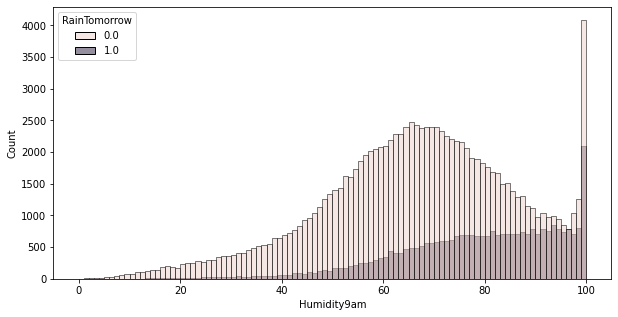

In [ ]:
# Distribusi dari Humidity9am dan RainTomorrow
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='Humidity9am', hue='RainTomorrow', ax=ax)

In [ ]:
# Kemungkinan hujan pada keesokan harinya jika Humidity9am lebih besar dr 85
hum9am_over85_rain=df.loc[(df.Humidity9am>=85) & (df.RainTomorrow==1)].shape[0]
hum9am_over85=df.loc[df.Humidity9am>=85].shape[0]

hum9am_lower85_rain=df.loc[(df.Humidity9am<85) & (df.RainTomorrow==1)].shape[0]
hum9am_lower85=df.loc[df.Humidity9am<85].shape[0]

proba_over_85=hum9am_over85_rain/hum9am_over85
proba_lower_85=hum9am_lower85_rain/hum9am_lower85

print(f'If Humidity9am is over than 85%, there is {proba_over_85*100}% chance of raining tomorrow.')
print(f'If Humidity9am is lower than 85%, there is {proba_lower_85*100}% chance of raining tomorrow.')

If Humidity9am is over than 85%, there is 38.9433450465446% chance of raining tomorrow.
If Humidity9am is lower than 85%, there is 16.952085825087888% chance of raining tomorrow.


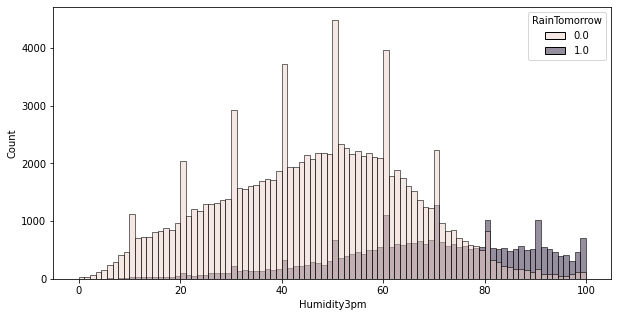

In [ ]:
# Distribusi dari Humidity3pm & RainTomorrow
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='Humidity3pm', hue='RainTomorrow', ax=ax)

In [ ]:
# Kemungkinan hujan pada keesokan harinya jika Humidity3pm lebih besar dr 80
hum3pm_over80_rain=df.loc[(df.Humidity3pm>=80) & (df.RainTomorrow==1)].shape[0]
hum3pm_over80=df.loc[df.Humidity3pm>=80].shape[0]

hum3pm_lower80_rain=df.loc[(df.Humidity3pm<80) & (df.RainTomorrow==1)].shape[0]
hum3pm_lower80=df.loc[df.Humidity3pm<80].shape[0]

proba_over_80=hum3pm_over80_rain/hum3pm_over80
proba_lower_80=hum3pm_lower80_rain/hum3pm_lower80

print(f'If Humidity3pm is over than 80%, there is {proba_over_80*100}% chance of raining tomorrow.')
print(f'If Humidity3pm is lower than 80%, there is {proba_lower_80*100}% chance of raining tomorrow.')

If Humidity3pm is over than 80%, there is 73.69697860766009% chance of raining tomorrow.
If Humidity3pm is lower than 80%, there is 16.402041617589322% chance of raining tomorrow.


Nilai Humidity3pm sangat berpengaruh terhadap terjadinya hujan pada keesokan harinya karena memiliki probabilitas yang lumayan tinggi jika valuenya lebih dr 80. Kita tidak akan mengubah nilai Humidity3pm maupun Humidity9am menjadi boolean karena kita dpt kehilangan banyak informasi berharga lainnya.

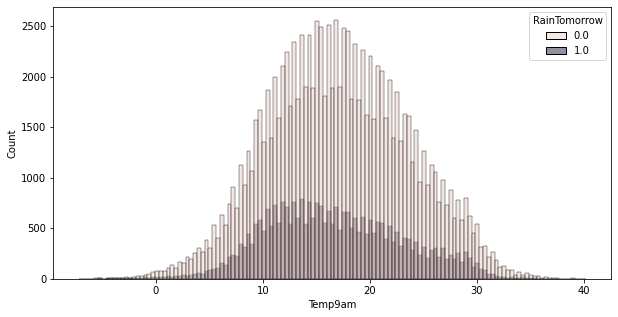

In [ ]:
# Distribusi dari Temp9am & RainTomorrow
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='Temp9am', hue='RainTomorrow', ax=ax)

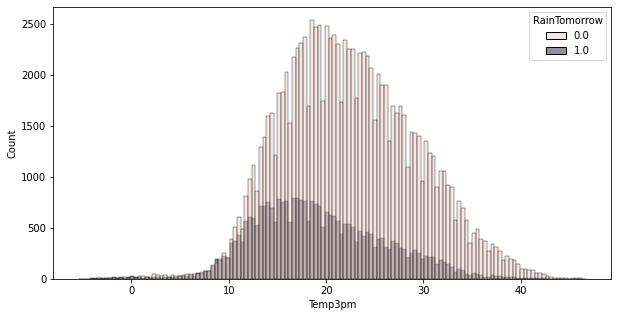

In [ ]:
# Distribusi dari Temp3pm and RainTomorrow
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='Temp3pm', hue='RainTomorrow', ax=ax)

#### Searching a correlation by Date

In [ ]:
# Grouping the dataset into one date
all_data_median=df.groupby('Date').median()
all_data_median.reset_index(inplace=True)

##### Searching for a pattern on Rainfall and Date

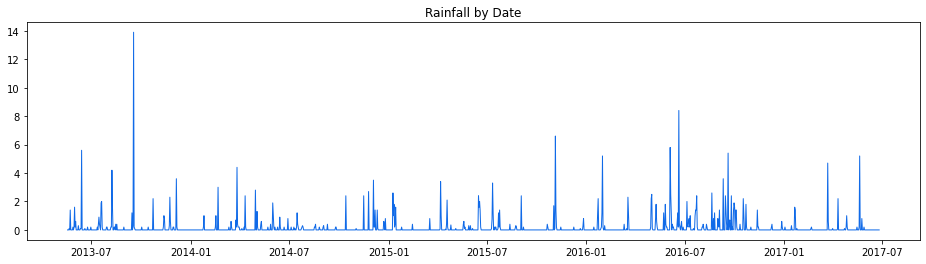

In [ ]:
# Searching for a pattern on Rainfall and Date
date_rainfall = all_data_median.iloc[-1500:,:]
plt.figure(figsize=[16,4])
plt.plot(date_rainfall['Date'],date_rainfall['Rainfall'],color='#106ae8',linewidth=1, label= 'Rainfall')
plt.title('Rainfall by Date')
plt.show()

The majority of rainfall occurs between December and March but there are months like Juny to July when rainfall occurs too.

##### Temp9am and Temp3pm

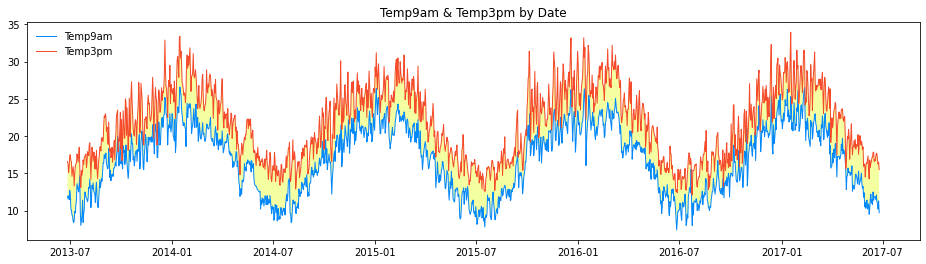

In [ ]:
# Searching for a pattern on Temperature and Date
date_temp = all_data_median.iloc[-1460:,:]
plt.figure(figsize=[16,4])
plt.plot(date_temp['Date'],date_temp['Temp9am'],color='#0388fc',linewidth=1, label= 'Temp9am')
plt.plot(date_temp['Date'],date_temp['Temp3pm'],color='#f54b2a',linewidth=1, label= 'Temp3pm')
plt.fill_between(date_temp['Date'],date_temp['Temp9am'],date_temp['Temp3pm'], facecolor = '#f4ffa1')
plt.title('Temp9am & Temp3pm by Date')
plt.legend(loc='upper left', frameon=False)
plt.show()

The highest temperature throughout the year is between December and February. The lowest temperature throughout the year is between June and August.

##### Pressure

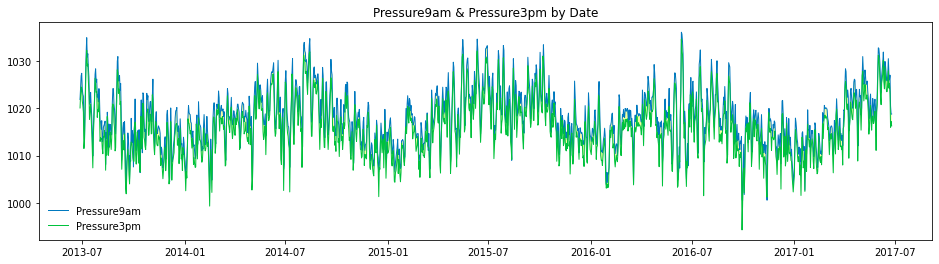

In [ ]:
# Searching for a pattern on Pressure and Date
date_pressure = all_data_median.iloc[-1460:,:]
plt.figure(figsize=[16,4])
plt.plot(date_pressure['Date'],date_pressure['Pressure9am'],color='#0079bf',linewidth=1, label= 'Pressure9am')
plt.plot(date_pressure['Date'],date_pressure['Pressure3pm'],color='#00c23d',linewidth=1, label= 'Pressure3pm')
plt.fill_between(date_temp['Date'],date_temp['Pressure9am'],date_temp['Pressure3pm'], facecolor = '#f4ffa1')
plt.title('Pressure9am & Pressure3pm by Date')
plt.legend(loc='lower left', frameon=False)
plt.show()

##### WindGustSpeed 

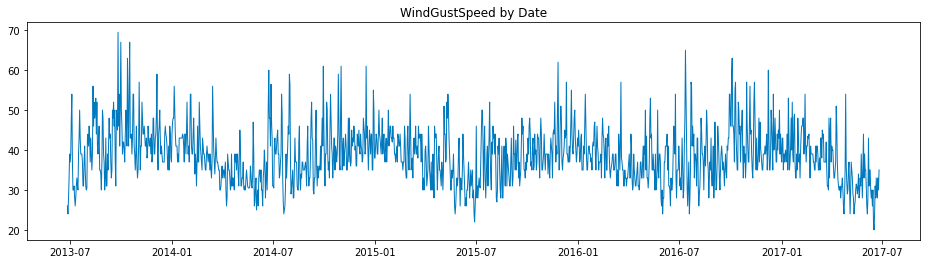

In [ ]:
# Searching for a pattern on WindGustSpeed and Date
date_wind = all_data_median.iloc[-1460:,:]
plt.figure(figsize=[16,4])
plt.plot(date_wind['Date'],date_wind['WindGustSpeed'],color='#0079bf',linewidth=1, label= 'WindGustSpeed')
plt.title('WindGustSpeed by Date')
plt.show()

In [ ]:
df.loc[df['RainToday']=='Yes','RainToday']=1
df.loc[df['RainToday']=='No','RainToday']=0

df.loc[df['RainTomorrow']=='Yes','RainTomorrow']=1
df.loc[df['RainTomorrow']=='No','RainTomorrow']=0

df.loc[:,'RainToday']=df.loc[:,'RainToday'].astype(float)
df.loc[:,'RainTomorrow']=df.loc[:,'RainTomorrow'].astype(float)

### Multivariate Analysis

In [ ]:
# Grouping the data by their Year, Month and RainTomorrow
df_grouped=df.groupby(['Year_Month','RainTomorrow']).median().reset_index()
df_grouped.head(5)

,Year_Month,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,2007-11,0.0,12.05,27.10,0.0,6.4,9.8,41.0,6.5,16.0,66.0,33.0,1019.45,1017.10,3.0,4.5,17.40,25.55,0.0,2007.0,11.0,17.0
1,2007-11,1.0,13.65,23.75,0.4,5.1,5.2,41.5,6.0,17.0,76.0,48.5,1013.40,1009.35,7.0,7.0,15.95,21.70,0.0,2007.0,11.0,6.5
2,2007-12,0.0,12.55,26.30,0.0,6.3,10.4,39.0,9.0,17.0,65.5,42.5,1017.50,1015.15,5.5,3.5,17.35,24.20,0.0,2007.0,12.0,13.5
3,2007-12,1.0,14.80,24.20,0.2,6.2,5.9,41.0,6.0,13.0,72.0,62.0,1012.90,1010.20,7.0,7.0,17.40,20.00,0.0,2007.0,12.0,19.0
4,2008-01,0.0,15.40,29.90,0.0,6.8,11.1,43.0,7.0,15.0,67.0,35.0,1015.70,1012.30,2.0,2.0,19.20,28.00,0.0,2008.0,1.0,14.0


#### Sunshine, Cloud3pm dan RainTomorrow

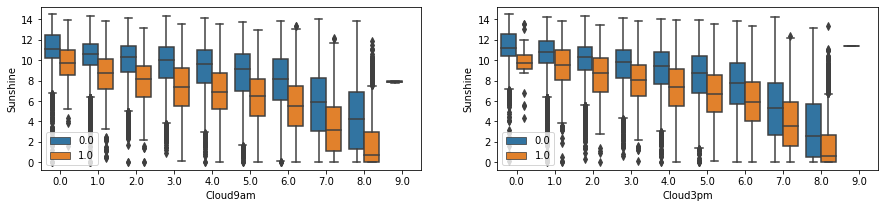

In [ ]:
# Sunshine, Cloud3pm dan RainTomorrow
fig, ax= plt.subplots(figsize=(15,3), ncols=2)
sns.boxplot(data=df, x='Cloud9am', y='Sunshine',hue='RainTomorrow', ax=ax[0])
sns.boxplot(data=df, x='Cloud3pm', y='Sunshine',hue='RainTomorrow', ax=ax[1])
ax[0].legend(loc='lower left')
ax[1].legend(loc='lower left')

Visualisasi di atas membuktikan pernyataan kami di correlation matrix yaitu:

- Cloud dan sunshine memiliki nilai korelasi negatif yang cukup tinggi. Hal ini terjadi karena ketika semakin tinggi nilai Cloud maka semakin rendah pula cahaya matahari yang menyentuh permukaan. Begitu pula sebaliknya. 
- Sunshine memiliki korelasi negatif yang cukup tinggi terhadap RainTomorrow. Visualisasi di atas membuktikkan bahwa Sunshine memiliki nilai yang lebih rendah jika keesokan harinya hujan

Selain itu, terdapat outliers pada data Cloud3pm dan Cloud9am. Dari visualisasi di atas juga terdapat beberapa values yang tidak janggal yaitu terdapat value "9" pada cloud, padahal kolom cloud menggunakan satuan oktas yang mana memiliki nilai tertinggi adalah 8. Outliers dan values yang janggal tersebut akan dibenah pada tahap pre-processing.


#### Humidity9am, Humidity3pm, and RainTomorrow

<Figure size 576x432 with 0 Axes>

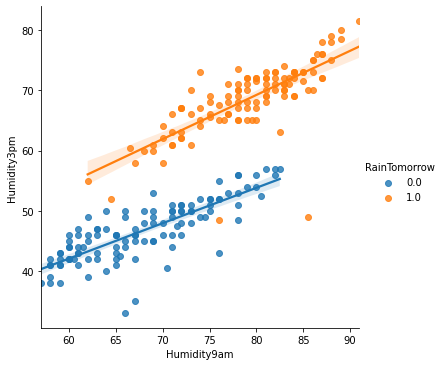

In [ ]:
# Looking for correlatin on Humidity9am, Humidity3pm, and RainTomorrow
plt.figure(figsize=(8,6))
sns.lmplot(data=df_grouped, x='Humidity9am',y='Humidity3pm', hue='RainTomorrow')

Terlihat bahwa semakin tinggi nilai Humidity3pm dan Humidity9am maka semakin sering pula terjadi hujan pada keesokan harinya. Namun, terdapat suatu perbedaan yaitu lebih banyak hujan pada keesokan harinya jika kolom Humidity3pm semakin tinggi dibandingkan kolom Humidity9am.

#### MaxTemp, MinTemp, and RainTomorrow

<Figure size 576x432 with 0 Axes>

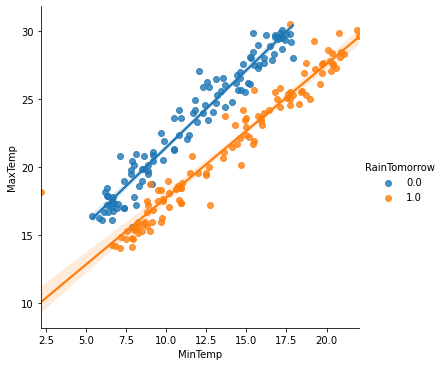

In [ ]:
# Looking for correlatin on MaxTemp, MinTemp, and RainTomorrow
plt.figure(figsize=(8,6))
sns.lmplot(data=df_grouped, x='MinTemp',y='MaxTemp', hue='RainTomorrow')

Terlihat bahwa semakin rendah MaxTemp dan semakin tinggi nilai MinTemp maka kemungkinan untuk hujan pada keesokan harinya lebih tinggi. Hal ini memberi ide bahwa selisih MaxTemp dan MinTemp yang rendah dapat memberikan suatu insight tentang hujan pada keesokan harinya. 

#### DiffTemp, Date, and RainTomorrow

In [ ]:
# Making a TempDiff column
df['DiffTemp']=df.MaxTemp-df.MinTemp
df['DiffTemp']=df['DiffTemp'].astype(float)

# Grouping the dataset into one date
df_grouped=df.groupby(['Year_Month','RainTomorrow']).median().reset_index()
df_grouped['Year_Month']=pd.to_datetime(df_grouped['Year_Month'])

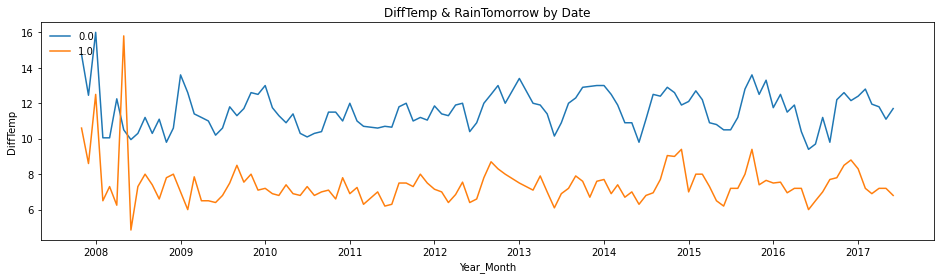

In [ ]:
# Looking for correlation on DiffTemp, Date, and RainTomorrow
plt.figure(figsize=[16,4])
sns.lineplot(data=df_grouped, x='Year_Month', y='DiffTemp',color='#0388fc', hue='RainTomorrow')
plt.title('DiffTemp & RainTomorrow by Date')
plt.legend(loc='upper left', frameon=False)
plt.show()

Visualisasi di atas menandakan bahwa DiffTemp yang rendah memiliki probabilitas lebih tinggi untuk terjadinya hujan pada esok hari dibandingkan DiffTemp yang tinggi. Pada tahun 2008-2009 terdapat anomali dimana DiffTemp memiliki nilai yang besar ketika keesokan harinya akan hujan. Anomali tersebut dapat dengan mudah dijelaskan dengan tidak memadainya data pada rentang tanggal tersebut. Kolom ini dapat digunakan sebagai salah satu feature engineering. 

### Melihat pola per bulan

In [ ]:
# Mengruoped data berdasarkan bulan 
df_grouped_month=df.groupby(['Month', 'RainTomorrow']).median().reset_index()
df_grouped_month.head()

,Month,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Day,DiffTemp
0,1,0.0,17.0,29.5,0.0,8.2,11.50,41.0,15.0,20.0,61.0,41.0,1013.5,1011.30,4.0,3.0,22.2,27.6,0.0,2013.0,16.0,12.6
1,1,1.0,20.3,28.2,0.8,6.6,4.55,44.0,13.0,19.0,77.0,69.0,1010.0,1007.65,7.0,7.0,23.5,25.7,0.0,2013.0,17.0,7.3
2,2,0.0,17.2,29.1,0.0,7.4,10.90,39.0,13.0,19.0,66.0,44.0,1015.3,1013.10,4.0,3.0,21.4,27.4,0.0,2014.0,15.0,12.2
3,2,1.0,19.9,27.2,0.8,6.0,4.00,43.0,13.0,19.0,80.0,70.5,1011.8,1009.80,7.0,7.0,22.6,25.0,0.0,2012.0,14.0,7.0
4,3,0.0,15.5,27.0,0.0,5.8,9.70,37.0,13.0,17.0,70.0,46.0,1017.7,1015.50,4.0,4.0,19.5,25.6,0.0,2013.0,16.0,11.6


##### Looking for correlation on DiffTemp, Month, and RainTomorrow

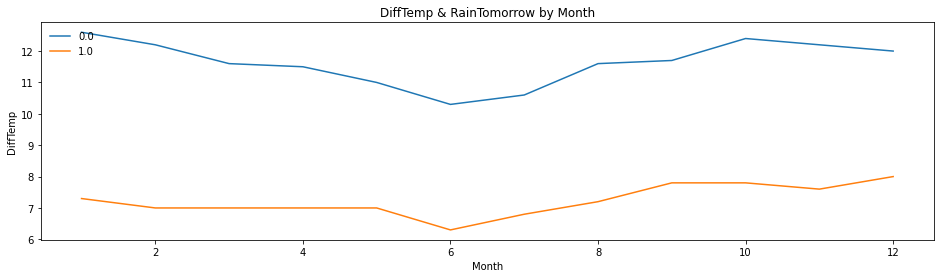

In [ ]:
# Looking for correlation on DiffTemp, Month, and RainTomorrow
plt.figure(figsize=[16,4])
sns.lineplot(data=df_grouped_month, x='Month', y='DiffTemp',color='#0388fc', hue='RainTomorrow')
plt.title('DiffTemp & RainTomorrow by Month')
plt.legend(loc='upper left', frameon=False)
plt.show()

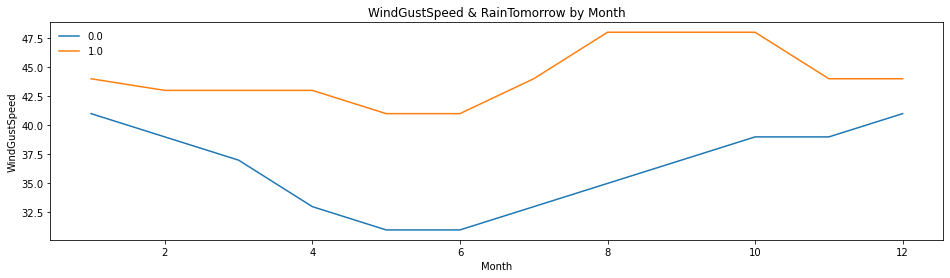

In [ ]:
# Looking for correlation on DiffTemp, Month, and RainTomorrow
plt.figure(figsize=[16,4])
sns.lineplot(data=df_grouped_month, x='Month', y='WindGustSpeed',color='#0388fc', hue='RainTomorrow')
plt.title('WindGustSpeed & RainTomorrow by Month')
plt.legend(loc='upper left', frameon=False)
plt.show()

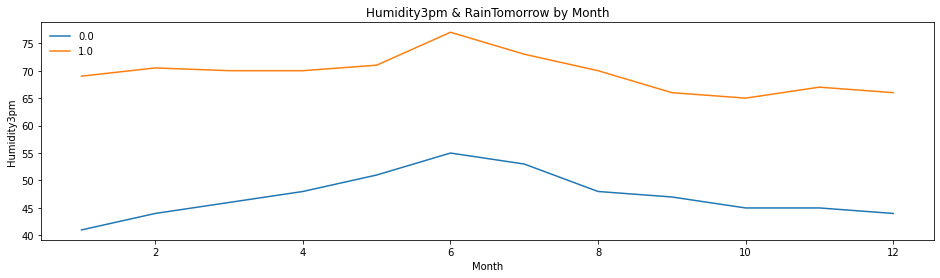

In [ ]:
# Looking for correlation on DiffTemp, Month, and RainTomorrow
plt.figure(figsize=[16,4])
sns.lineplot(data=df_grouped_month, x='Month', y='Humidity3pm',color='#0388fc', hue='RainTomorrow')
plt.title('Humidity3pm & RainTomorrow by Month')
plt.legend(loc='upper left', frameon=False)
plt.show()

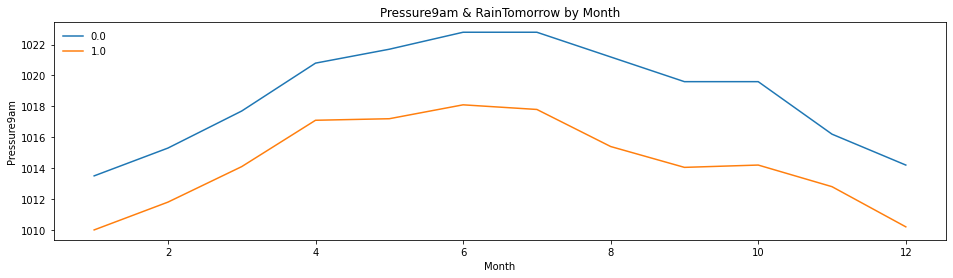

In [ ]:
# Looking for correlation on DiffTemp, Month, and RainTomorrow
plt.figure(figsize=[16,4])
sns.lineplot(data=df_grouped_month, x='Month', y='Pressure9am',color='#0388fc', hue='RainTomorrow')
plt.title('Pressure9am & RainTomorrow by Month')
plt.legend(loc='upper left', frameon=False)
plt.show()

Dari visualisasi di atas terlihat bahwa terdapat perbedaan nilai tengah variabel terhadap RainTomorrow. Kami akan membuat feature engineering berdasarkan nilai tengah antara variabel RainTomorrow yang bernilai 1 dan 0. Nilai tengah tersebut akan menjadi pembagi anatara akan kecenderungan akan hujan atau tidak.

In [ ]:
# Making a middle divider
middle_divider = df_grouped_month.groupby('Month')['DiffTemp', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am'].median().reset_index()
middle_divider.rename(columns={'DiffTemp': 'middle_DiffTemp', 
                                 'WindGustSpeed' : 'middle_WindGustSpeed', 
                                 'Humidity3pm' : 'middle_Humidity3pm', 
                                 'Pressure9am' : 'middle_Pressure9am'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
middle_divider

,Month,middle_DiffTemp,middle_WindGustSpeed,middle_Humidity3pm,middle_Pressure9am
0,1,9.95,42.5,55.00,1011.750
1,2,9.60,41.0,57.25,1013.550
2,3,9.30,40.0,58.00,1015.900
3,4,9.25,38.0,59.00,1018.950
4,5,9.00,36.0,61.00,1019.450
5,6,8.30,36.0,66.00,1020.450
6,7,8.70,38.5,63.00,1020.300
7,8,9.40,41.5,59.00,1018.300
8,9,9.75,42.5,56.50,1016.825
9,10,10.10,43.5,55.00,1016.900


## Pre-Processing

#### 1. Drop Ducplication


In [ ]:
print('Shape dari dataset sebelum drop duplicates :',df.shape)

df = df.drop_duplicates()
print('Shape dari dataset setelah drop duplicates :',df.shape)

Shape dari dataset sebelum drop duplicates : (145460, 28)
Shape dari dataset setelah drop duplicates : (145460, 28)


Tidak ada perubahan shape dari dataset sehingga dapat disimpulkan bahwa tidak ada data yang duplikat

#### 2. Dropping High Missing Values Columns ('Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm')

In [ ]:
df.drop(['Evaporation',
         'Sunshine',
         'Cloud9am',
         'Cloud3pm'], axis=1, inplace=True)

#### 3. Filling the Missing Values of Each Column 

MinTemp, MaxTemp, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, and Temp3pm memiliki std yang relatif kecil dibandingkan dengan rata-ratanya. Karena itu, mereka akan diisi dengan rata-rata setiap kolom antara 7 hari sebelum dan 7 hari setelah dari tanggal nilai hilang NaN dengan masing-masing lokasinya.

In [ ]:
# Imputing the missing value of MinTemp, MaxTemp, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, 
# Pressure3pm, Temp9am, and Temp3pm 
impute_mean=df[['Date','Location','MinTemp', 'MaxTemp', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 
                'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']]
impute_mean_namecol=impute_mean.drop(['Date', 'Location'], axis = 1).columns

for col_name in impute_mean_namecol:
    impute_mean=df[['Date','Location','MinTemp', 'MaxTemp', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 
                'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']]
    missing_val=impute_mean[impute_mean[col_name].isnull()][[col_name, 'Date', 'Location']]
    for index in missing_val.index:
        date=missing_val.loc[index]['Date']
        location=missing_val.loc[index]['Location']
    
        start=date - pd.Timedelta("7 day")
        end=date + pd.Timedelta("7 day")
        
        impute_mean.set_index('Date', inplace=True)
        
        mean=impute_mean[impute_mean['Location']==location][col_name].loc[start:end].mean()
        mean='%.2f'%mean
        
        impute_mean.reset_index(inplace=True)
        
        df.loc[index, col_name]=mean
        

WindSpeed9am, WindSpeed3pm and Rainfall memiliki std yang relatif besar dibandingkan dengan rata-ratanya. Oleh karena itu, mereka akan diisi dengan median masing-masing kolom antara 7 hari sebelum dan 7 hari setelah dari tanggal nilai hilang NaN dengan masing-masing lokasinya.

In [ ]:
# Imputing the missing value of WindSpeed9am, WindSpeed3pm and Rainfall
impute_median=df[['Date', 'Location','WindSpeed9am', 'WindSpeed3pm', 'Rainfall']]
impute_median_namecol=impute_median.drop(['Date', 'Location'], axis = 1).columns


for col_name in impute_median_namecol:
    missing_val=impute_median[impute_median[col_name].isnull()][[col_name, 'Date', 'Location']]
    for index in missing_val.index:
        date=missing_val.loc[index]['Date']
        location=missing_val.loc[index]['Location']
    
        start=date - pd.Timedelta("7 day")
        end=date + pd.Timedelta("7 day")
        
        impute_median.set_index('Date', inplace=True)
        
        median=impute_median[impute_median['Location']==location][col_name].loc[start:end].median()
        
        impute_median.reset_index(inplace=True)
        
        df.loc[index, col_name]=median
        

Nilai kosong dari kolom WindGustDir, WindDir9am dan WindDir3pm akan diisi dengan moudus setiap kolom antara 8 hari sebelum dan 7 hari setelah dari tanggal nilai hilang NaN dengan masing-masing lokasinya.

In [ ]:
# Imputing the missing value of WindGustDir, WindDir9am and WindDir3pm
impute_mode=df[['Date', 'Location','WindGustDir', 'WindDir9am', 'WindDir3pm']]
impute_mode_namecol=impute_mode.drop(['Date', 'Location'], axis = 1).columns


for col_name in impute_mode_namecol:
    missing_val=impute_mode[impute_mode[col_name].isnull()][[col_name, 'Date', 'Location']]
    for index in missing_val.index:
        date=missing_val.loc[index]['Date']
        location=missing_val.loc[index]['Location']
    
        start=date - pd.Timedelta("8 day")
        end=date + pd.Timedelta("7 day")
        
        impute_mode.set_index('Date', inplace=True)
        
        mode=impute_mode[impute_mode['Location']==location][col_name].loc[start:end].mode(dropna=False)
        
        impute_mode.reset_index(inplace=True)
        
        df.loc[index, col_name]=mode[0]

In [ ]:
#Showing the NaN value of the data
print('Showing the NaN value of the data : ')
print(df.isnull().sum())

Showing the NaN value of the data : 
Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday        3261
RainTomorrow     3267
Year                0
Month               0
Day                 0
Year_Month          0
DiffTemp            0
dtype: int64


In [ ]:
#Showing the percentage of the NaN value 
print('Showing the percentage of the NaN value : ')
print(df.isnull().sum()*100/df.shape[0])

Showing the percentage of the NaN value : 
Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
WindGustDir      0.000000
WindGustSpeed    0.000000
WindDir9am       0.000000
WindDir3pm       0.000000
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
Year             0.000000
Month            0.000000
Day              0.000000
Year_Month       0.000000
DiffTemp         0.000000
dtype: float64


In [ ]:
# Showing the data types of each columns
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Temp9am                 float64
Temp3pm                 float64
RainToday               float64
RainTomorrow            float64
Year                      int64
Month                     int64
Day                       int64
Year_Month               object
DiffTemp                float64
dtype: object

Setelah menggunakan cara pengisian data yang kosong berdasarkan waktu dan lokasi, ternyata masih ada data yang kosong. Data kosong tersebut tidak terisi karena terdapat data yang semuanya kosong dalam jangka waktu yang ditentukan. Oleh karena itu, kami akan mengisi data yang kosong tersebut menggunakan mean atau median atau modus tiap kolom secara keseuluruhan.

Sebelum mengisi data-data yong kosong lebih lanjut, kami akan mengubah data types yang tadinya float menjadi object. Oleh karena itu kami akan mengubah kolom-kolom tersebut kembali menjadi tipe data float.

In [ ]:
fill_mean=['MinTemp', 'MaxTemp', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm','Pressure9am', 
      'Pressure3pm', 'Temp9am', 'Temp3pm']
fill_median=['WindSpeed9am', 'WindSpeed3pm', 'Rainfall']
fill_mode=['WindGustDir', 'WindDir9am', 'WindDir3pm']

df[fill_mean]=df[fill_mean].astype(float)
df[fill_median]=df[fill_median].astype(float)

df['Year_Month']=pd.to_datetime(df['Year_Month'])

In [ ]:
# Showing the data types of each columns
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Temp9am                 float64
Temp3pm                 float64
RainToday               float64
RainTomorrow            float64
Year                      int64
Month                     int64
Day                       int64
Year_Month       datetime64[ns]
DiffTemp                float64
dtype: object

In [ ]:
# Fill in the missing values using the mean or median or mode of each column
for col_name in fill_mean:
    col_mean=df[col_name].mean()
    df[col_name].fillna(col_mean, inplace=True)
    
for col_name in fill_median:
    col_median=df[col_name].median()
    df[col_name].fillna(col_mean, inplace=True)
    
for col_name in fill_mode:
    col_mode=df[col_name].mode()[0]
    df[col_name].fillna(col_mode, inplace=True)

In [ ]:
#Showing the NaN value of the data
print('Showing the NaN value of the data : ')
print(df.isnull().sum())

Showing the NaN value of the data : 
Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday        3261
RainTomorrow     3267
Year                0
Month               0
Day                 0
Year_Month          0
DiffTemp            0
dtype: int64


Sekarang sudah tidak ada data yang kosong kecuali pada kolom target dan kolom feature engineering. Data yang kosong tersebut akan dibenahi pada tahap selanjutnya

In [ ]:
#df.to_csv('/content/drive/MyDrive/Dataset (1)/weatherAUS_imputed.csv')

#### 4. Create Feature Baru

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset (1)/weatherAUS_imputed.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Year_Month,DiffTemp
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,2008,12,1,2008-12-01,9.5
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,2008,12,2,2008-12-01,17.7
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,2008,12,3,2008-12-01,12.8
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,2008,12,4,2008-12-01,18.8
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,2008,12,5,2008-12-01,14.8


In [ ]:
#HighWind
df.loc[((df.WindGustSpeed>=80) | (df.WindSpeed9am>=60) | (df.WindSpeed3pm>=60))
      & (df.RainTomorrow==1), 'HighWind']=1

#HighHumidity 
df.loc[(df.Humidity3pm>=80), 'HighHumidity']=1

#Freezing
df.loc[(df.MaxTemp<=0), 'Freezing']=1

#Making a new column called "TempDiff"
df['DiffTemp']=df.MaxTemp-df.MinTemp

In [ ]:
# Middle Divider
df=df.merge(middle_divider, on='Month')

df.loc[df.DiffTemp <= df.middle_DiffTemp, 'Binary_DiffTemp']=1
df.loc[df.WindGustSpeed >= df.middle_WindGustSpeed, 'Binary_WindGustSpeed']=1
df.loc[df.DiffTemp >= df.middle_Humidity3pm, 'Binary_Humidity3pm']=1
df.loc[df.DiffTemp <= df.middle_Pressure9am, 'Binary_Pressure9am']=1

df.drop(['Binary_DiffTemp', 'Binary_WindGustSpeed', 'Binary_Humidity3pm', 'Binary_Pressure9am'], axis=1)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Year_Month,DiffTemp,HighWind,HighHumidity,Freezing,middle_DiffTemp,middle_WindGustSpeed,middle_Humidity3pm,middle_Pressure9am
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,2008,12,1,2008-12-01,9.5,NaN,NaN,NaN,10.0,42.5,55.0,1012.2
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,2008,12,2,2008-12-01,17.7,NaN,NaN,NaN,10.0,42.5,55.0,1012.2
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,2008,12,3,2008-12-01,12.8,NaN,NaN,NaN,10.0,42.5,55.0,1012.2
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,2008,12,4,2008-12-01,18.8,NaN,NaN,NaN,10.0,42.5,55.0,1012.2
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,2008,12,5,2008-12-01,14.8,NaN,NaN,NaN,10.0,42.5,55.0,1012.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2016-11-26,Uluru,16.1,34.2,0.0,E,50.0,E,E,24.0,19.0,21.0,12.0,1016.5,1012.0,26.4,32.2,0.0,0.0,2016,11,26,2016-11-01,18.1,NaN,NaN,NaN,9.9,41.5,56.0,1014.5
145456,2016-11-27,Uluru,16.8,35.5,0.0,ENE,37.0,ENE,S,22.0,9.0,13.0,8.0,1015.3,1011.1,27.3,34.0,0.0,0.0,2016,11,27,2016-11-01,18.7,NaN,NaN,NaN,9.9,41.5,56.0,1014.5
145457,2016-11-28,Uluru,14.9,38.7,0.0,SSW,37.0,NE,ESE,19.0,17.0,9.0,6.0,1012.9,1008.9,30.5,37.0,0.0,0.0,2016,11,28,2016-11-01,23.8,NaN,NaN,NaN,9.9,41.5,56.0,1014.5
145458,2016-11-29,Uluru,17.1,41.5,0.0,SSE,63.0,NE,ESE,7.0,15.0,9.0,6.0,1011.0,1006.9,30.9,39.2,0.0,0.0,2016,11,29,2016-11-01,24.4,NaN,NaN,NaN,9.9,41.5,56.0,1014.5


In [ ]:
df['HighWind']=df['HighWind'].astype(float)
df['Freezing']=df['Freezing'].astype(float)
df['HighHumidity']=df['HighHumidity'].astype(float)
df['Binary_DiffTemp']=df['Binary_DiffTemp'].astype(float)
df['Binary_WindGustSpeed']=df['Binary_WindGustSpeed'].astype(float)
df['Binary_Humidity3pm']=df['Binary_Humidity3pm'].astype(float)
df['Binary_Pressure9am']=df['Binary_Pressure9am'].astype(float)

In [ ]:
print(df.isnull().sum())

Date                         0
Location                     0
MinTemp                      0
MaxTemp                      0
Rainfall                     0
WindGustDir                  0
WindGustSpeed                0
WindDir9am                   0
WindDir3pm                   0
WindSpeed9am                 0
WindSpeed3pm                 0
Humidity9am                  0
Humidity3pm                  0
Pressure9am                  0
Pressure3pm                  0
Temp9am                      0
Temp3pm                      0
RainToday                 3261
RainTomorrow              3267
Year                         0
Month                        0
Day                          0
Year_Month                   0
DiffTemp                     0
HighWind                144485
HighHumidity            131760
Freezing                145333
middle_DiffTemp              0
middle_WindGustSpeed         0
middle_Humidity3pm           0
middle_Pressure9am           0
Binary_DiffTemp          83868
Binary_W

#### 5. Dropping Unimportant Column

In [ ]:
df.drop(['Date','Year_Month', 'Year', 'Day','middle_DiffTemp', 'middle_WindGustSpeed', 'middle_Humidity3pm', 'middle_Pressure9am'], axis=1,  inplace=True)

In [ ]:
df.isnull().sum()

Location                     0
MinTemp                      0
MaxTemp                      0
Rainfall                     0
WindGustDir                  0
WindGustSpeed                0
WindDir9am                   0
WindDir3pm                   0
WindSpeed9am                 0
WindSpeed3pm                 0
Humidity9am                  0
Humidity3pm                  0
Pressure9am                  0
Pressure3pm                  0
Temp9am                      0
Temp3pm                      0
RainToday                 3261
RainTomorrow              3267
Month                        0
DiffTemp                     0
HighWind                144485
HighHumidity            131760
Freezing                145333
Binary_DiffTemp          83868
Binary_WindGustSpeed     81873
Binary_Humidity3pm      145460
Binary_Pressure9am           0
dtype: int64

#### 6.Dropping Missing Values on target column

In [ ]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [ ]:
df.fillna({'HighWind':0, 'HighHumidity':0, 'Freezing':0, 'Binary_DiffTemp':0, 'Binary_WindGustSpeed':0, 'Binary_Humidity3pm':0}, inplace=True)

In [ ]:
df.isnull().sum()

Location                0
MinTemp                 0
MaxTemp                 0
Rainfall                0
WindGustDir             0
WindGustSpeed           0
WindDir9am              0
WindDir3pm              0
WindSpeed9am            0
WindSpeed3pm            0
Humidity9am             0
Humidity3pm             0
Pressure9am             0
Pressure3pm             0
Temp9am                 0
Temp3pm                 0
RainToday               0
RainTomorrow            0
Month                   0
DiffTemp                0
HighWind                0
HighHumidity            0
Freezing                0
Binary_DiffTemp         0
Binary_WindGustSpeed    0
Binary_Humidity3pm      0
Binary_Pressure9am      0
dtype: int64

#### 7. Label Encoding Categorical Values

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df.loc[:,'Location']=labelencoder.fit_transform(df['Location'])
df.loc[:,'WindGustDir']=labelencoder.fit_transform(df['WindGustDir'])
df.loc[:,'WindDir9am']=labelencoder.fit_transform(df['WindDir9am'])
df.loc[:,'WindDir3pm']=labelencoder.fit_transform(df['WindDir3pm'])

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,DiffTemp,HighWind,HighHumidity,Freezing,Binary_DiffTemp,Binary_WindGustSpeed,Binary_Humidity3pm,Binary_Pressure9am
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,12,9.5,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,12,17.7,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,12,12.8,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,12,18.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,12,14.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#df.to_csv('/content/drive/MyDrive/Dataset (1)/weatherAUS_done.csv')

#### 8. Feature Scaling (Standardization)

In [ ]:
#Import libraries
 
#Data analysis & preprocessing
import pandas as pd
import numpy as np 
 
#Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset (1)/weatherAUS_done.csv')

In [ ]:
# Making variable x and y
x=df.drop(['RainTomorrow'], axis=1)
y=df['RainTomorrow']

In [ ]:
from sklearn.preprocessing import StandardScaler
cols=x.columns
sc = StandardScaler()
x_standard = sc.fit_transform(x)

x=pd.DataFrame(x_standard, columns=cols)
df=pd.concat([x, y], axis=1)

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Month,DiffTemp,HighWind,HighHumidity,Freezing,Binary_DiffTemp,Binary_WindGustSpeed,Binary_Humidity3pm,Binary_Pressure9am,RainTomorrow
0,-1.526,0.1894,-0.0473,-0.2067,1.0632,0.3045,1.3057,1.3655,0.6748,0.6111,0.1128,-1.4291,-1.4739,-1.2201,-0.0102,0.0177,-0.5364,1.6333,-0.3127,-0.0828,-0.3219,-0.0281,1.1674,1.1389,0.0,0.0,0.0
1,-1.526,-0.7480,0.2620,-0.2776,1.2762,0.3045,-0.2432,1.5847,-1.1273,0.3823,-1.3066,-1.2836,-1.0445,-1.1154,0.0359,0.3800,-0.5364,1.6333,1.3431,-0.0828,-0.3219,-0.0281,-0.8566,1.1389,0.0,0.0,0.0
2,-1.526,0.1113,0.3463,-0.2776,1.4892,0.4566,1.3057,1.5847,0.5622,0.8398,-1.6220,-1.0411,-1.4887,-0.9808,0.6198,0.2206,-0.5364,1.6333,0.3536,-0.0828,-0.3219,-0.0281,-0.8566,1.1389,0.0,0.0,0.0
3,-1.526,-0.4668,0.6697,-0.2776,-0.8540,-1.2156,0.4206,-1.7039,-0.3388,-1.1045,-1.2541,-1.7201,-0.0079,-0.3676,0.1742,0.6989,-0.5364,1.6333,1.5652,-0.0828,-0.3219,-0.0281,-0.8566,-0.8780,0.0,0.0,0.0
4,-1.526,0.8299,1.2742,-0.1595,1.0632,0.0765,-1.3495,-0.1692,-0.7894,0.1536,0.6910,-0.8956,-1.0148,-1.3846,0.1281,1.1627,-0.5364,1.6333,0.7575,-0.0828,-0.3219,-0.0281,-0.8566,-0.8780,0.0,0.0,0.0


#### 9. Splitting into train and test dataset

In [ ]:
x=df.drop(['RainTomorrow'], axis=1)
y=df['RainTomorrow']

# Split x and y into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

# Making train and test dataset
train=pd.concat([x_train, y_train], axis=1)
test=pd.concat([x_test, y_test], axis=1)

#### 10. Upsampling minority target on training dataset

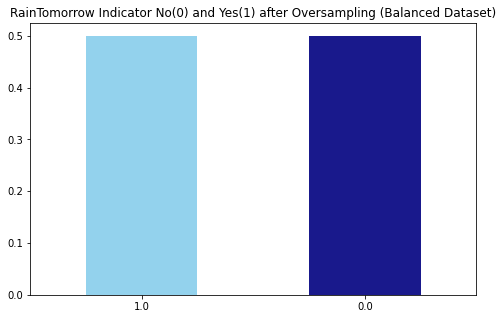

In [ ]:
from sklearn.utils import resample

no = train[train.RainTomorrow == 0]
yes = train[train.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
train = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
train.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Month,DiffTemp,HighWind,HighHumidity,Freezing,Binary_DiffTemp,Binary_WindGustSpeed,Binary_Humidity3pm,Binary_Pressure9am,RainTomorrow
0,-1.526,0.1894,-0.0473,-0.2067,1.0632,0.3045,1.3057,1.3655,0.6748,0.6111,0.1128,-1.4291,-1.4739,-1.2201,-0.0102,0.0177,-0.5364,1.6333,-0.3127,-0.0828,-0.3219,-0.0281,1.1674,1.1389,0.0,0.0,0.0
1,-1.526,-0.7480,0.2620,-0.2776,1.2762,0.3045,-0.2432,1.5847,-1.1273,0.3823,-1.3066,-1.2836,-1.0445,-1.1154,0.0359,0.3800,-0.5364,1.6333,1.3431,-0.0828,-0.3219,-0.0281,-0.8566,1.1389,0.0,0.0,0.0
2,-1.526,0.1113,0.3463,-0.2776,1.4892,0.4566,1.3057,1.5847,0.5622,0.8398,-1.6220,-1.0411,-1.4887,-0.9808,0.6198,0.2206,-0.5364,1.6333,0.3536,-0.0828,-0.3219,-0.0281,-0.8566,1.1389,0.0,0.0,0.0
3,-1.526,-0.4668,0.6697,-0.2776,-0.8540,-1.2156,0.4206,-1.7039,-0.3388,-1.1045,-1.2541,-1.7201,-0.0079,-0.3676,0.1742,0.6989,-0.5364,1.6333,1.5652,-0.0828,-0.3219,-0.0281,-0.8566,-0.8780,0.0,0.0,0.0
4,-1.526,0.8299,1.2742,-0.1595,1.0632,0.0765,-1.3495,-0.1692,-0.7894,0.1536,0.6910,-0.8956,-1.0148,-1.3846,0.1281,1.1627,-0.5364,1.6333,0.7575,-0.0828,-0.3219,-0.0281,-0.8566,-0.8780,0.0,0.0,0.0


## Machine Learning

### 1. Splitting into x_train, y_train, x_test, y_test 

In [ ]:
x_train = train.drop('RainTomorrow', axis=1)
y_train = train.RainTomorrow

x_test = test.drop('RainTomorrow', axis=1)
y_test = test.RainTomorrow

### 2. Making Function

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
all_metrics=pd.DataFrame(columns=['Model Name', 'Accuracy(test)', 'Accuracy(train)', 'ROC AUC(test)', 'ROC AUC(train)', 'Precision', 'Recall', 'f1'])

import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True, to_df=False, name=None):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    roc_auc = roc_auc_score(y_test, y_pred) 
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    coh_kap = cohen_kappa_score(y_test, y_pred)

    confusion=confusion_matrix(y_test, y_pred, normalize = 'all')    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    global all_metrics
    if to_df == True:
        metrics=pd.DataFrame({'Model Name': [name], 'Accuracy(test)':[accuracy], 
                              'Accuracy(train)':[accuracy_train], 'ROC AUC(test)':[roc_auc],
                              'ROC AUC(train)':[roc_auc_train], 'Precision':[precision], 
                              'Recall':[recall], 'f1':[f1], 
                              'False Positive': [confusion[1][1]], 'False Negative':confusion[1][0]})
        all_metrics=pd.concat([all_metrics,metrics], axis=0)

    time_taken = time.time()-t0

    print("Accuracy test = {}".format(accuracy))
    print("Accuracy train = {}".format(accuracy_train))
    print("ROC AUC test = {}".format(roc_auc))
    print("ROC AUC train = {}".format(roc_auc_train))
    print("Cohen's Kappa test = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    return model, accuracy, roc_auc, coh_kap, time_taken

def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### 3. Training Model

#### a. Decision Tree

Accuracy test = 0.7630158391931245
Accuracy train = 0.7797629243893247
ROC AUC test = 0.7506716256046873
ROC AUC train = 0.7797629243893248
Cohen's Kappa test = 0.4190558159116192
Time taken = 0.6482641696929932
              precision    recall  f1-score   support

         0.0    0.91085   0.77256   0.83602     22019
         1.0    0.47184   0.72878   0.57282      6139

    accuracy                        0.76302     28158
   macro avg    0.69134   0.75067   0.70442     28158
weighted avg    0.81514   0.76302   0.77864     28158



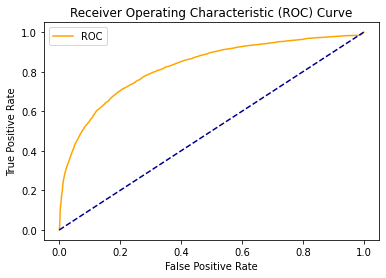

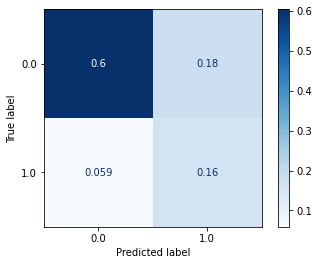

In [ ]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 10,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, x_train, y_train, x_test, y_test, to_df=True, name='Decision Tree')

#### b. Random Forest 

Accuracy test = 0.7981035584913702
Accuracy train = 0.7901606769673507
ROC AUC test = 0.7765723860883048
ROC AUC train = 0.7901606769673507
Cohen's Kappa test = 0.4829857240535238
Time taken = 25.83838725090027
              precision    recall  f1-score   support

         0.0    0.91783   0.81475   0.86323     22019
         1.0    0.52636   0.73839   0.61460      6139

    accuracy                        0.79810     28158
   macro avg    0.72210   0.77657   0.73891     28158
weighted avg    0.83249   0.79810   0.80902     28158



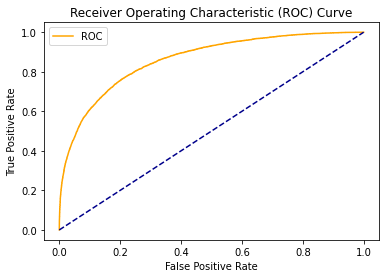

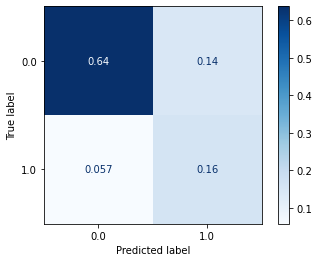

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 8,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 7}

model_rf = RandomForestClassifier(**params_rf)

model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf  = run_model(model_rf, x_train, y_train, x_test, y_test, to_df=True, name='Random Forest')

#### c. XGBoost

Accuracy test = 0.8303146530293345
Accuracy train = 0.8933388148503432
ROC AUC test = 0.8005163483289739
ROC AUC train = 0.8933388148503432
Cohen's Kappa test = 0.5470492073530036
Time taken = 99.77279329299927
              precision    recall  f1-score   support

         0.0    0.92384   0.85335   0.88720     22019
         1.0    0.58703   0.74768   0.65769      6139

    accuracy                        0.83031     28158
   macro avg    0.75544   0.80052   0.77244     28158
weighted avg    0.85041   0.83031   0.83716     28158



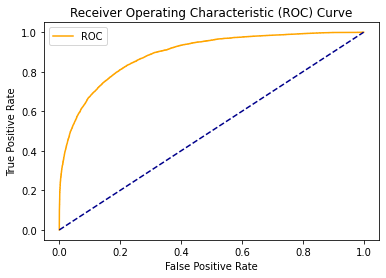

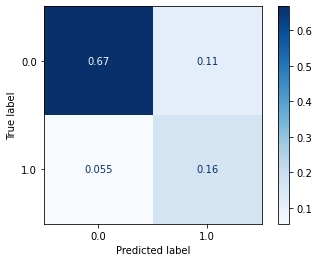

In [ ]:
import xgboost as xgb
params_xgb ={'n_estimators': 166,
            'max_depth': 9,
            'learning_rate': 0.08}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, x_train, y_train, x_test, y_test, to_df=True, name='XGBoost')

#### d. LGBM Classifier

In [ ]:
# Converting variable to numpy because LGBM Classifier can't accept DataFrame type variable
x_train_np=x_train.to_numpy()
y_train_np=y_train

x_test_np=x_test.to_numpy()
y_train_np=y_test.to_numpy()

Accuracy test = 0.8117053768023297
Accuracy train = 0.8191556179839438
ROC AUC test = 0.8015988146770813
ROC AUC train = 0.8191556179839437
Cohen's Kappa test = 0.5220578620401934
Time taken = 6.600820302963257
              precision    recall  f1-score   support

         0.0    0.93145   0.81952   0.87191     22019
         1.0    0.54764   0.78368   0.64473      6139

    accuracy                        0.81171     28158
   macro avg    0.73954   0.80160   0.75832     28158
weighted avg    0.84777   0.81171   0.82238     28158



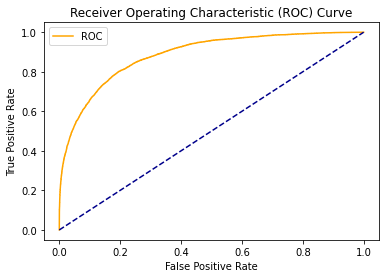

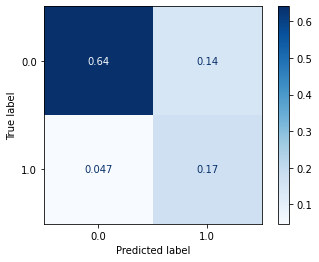

In [ ]:
from lightgbm import LGBMClassifier
model_lgbm=LGBMClassifier()

model_lgbm, accuracy_lgbm, roc_auc_lgbm, coh_kap_lgbm, tt_lgbm  = run_model(model_lgbm, x_train_np, y_train, x_test_np, y_test, to_df=True, name='LGBM')

### 4. Model Selection

In [ ]:
# Making the preicision up to 2 numbers behind coma
pd.set_option('precision', 4)

In [ ]:
# Showing the score on each model
all_metrics

,Model Name,Accuracy(test),Accuracy(train),ROC AUC(test),ROC AUC(train),Precision,Recall,f1,False Positive,False Negative
0,Decision Tree,0.7630,0.7798,0.7507,0.7798,0.4718,0.7288,0.5728,0.1589,0.0591
0,Random Forest,0.7981,0.7902,0.7766,0.7902,0.5264,0.7384,0.6146,0.1610,0.0570
0,XGBoost,0.8303,0.8933,0.8005,0.8933,0.5870,0.7477,0.6577,0.1630,0.0550
0,LGBM,0.8117,0.8192,0.8016,0.8192,0.5476,0.7837,0.6447,0.1709,0.0472


Dari hasil di atas dapat terlihat bahwa model XGBoost dan LGBM 2 model yang paling unggul serta memiliki score yang hampir sama. Terdapat overfit pada model XGBoost serta XGBoost memiliki nilai recall serta ROC AUC yang lebih rendah daripada LGBM. Selain itu, LGBM memiliki false negative yang lebih rendah dan false positive yang lebih tinggi. Oleh karena itu, kami akan memilih model LGBM.

### 5. Feature Selection

Sebelum feature selection  (175134, 26)
Setelah feature selection  (175134, 13)
Score of features  [ 1  1  1  5  2  1  3  1  6  1  1  1  1  1  1  4 11  1  1  7 12 10  9  8
 13 14]


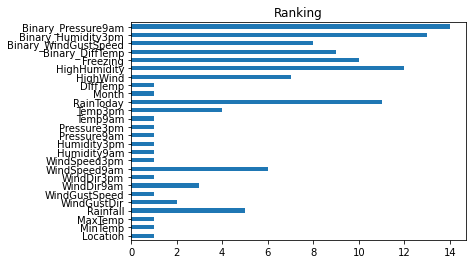

In [ ]:
# OPtimizing LGBM
from sklearn.feature_selection import RFE
from lightgbm import LGBMClassifier

estimator = LGBMClassifier(max_depth=12)
wrapper = RFE(estimator, n_features_to_select=13)
x_new = wrapper.fit_transform(x_train, y_train)

print('Sebelum feature selection ', x_train.shape)
print('Setelah feature selection ', x_new.shape)
print('Score of features ', wrapper.ranking_)

feat_importances = pd.Series(wrapper.ranking_, index=x.columns)
feat_importances.plot(kind='barh')
plt.title('Ranking')
plt.show()


In [ ]:
X_train_new = wrapper.transform(x_train)
y_train_np = y_train.to_numpy()

x_test_new = wrapper.transform(x_test)
y_test_np = y_test.to_numpy()

Accuracy test = 0.8010512110235102
Accuracy train = 0.8119611269085386
ROC AUC test = 0.7912621865221007
ROC AUC train = 0.8119611269085386
Cohen's Kappa test = 0.49959383130134993
Time taken = 4.796637535095215
              precision    recall  f1-score   support

         0.0    0.92768   0.80862   0.86407     22019
         1.0    0.52995   0.77390   0.62910      6139

    accuracy                        0.80105     28158
   macro avg    0.72882   0.79126   0.74659     28158
weighted avg    0.84097   0.80105   0.81284     28158



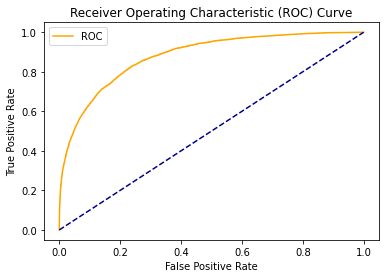

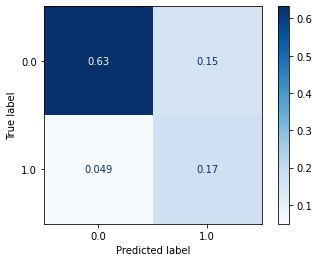

In [ ]:
from lightgbm import LGBMClassifier
model_lgbm=LGBMClassifier(max_depth=12)

model_lgbm, accuracy_lgbm, roc_auc_lgbm, coh_kap_lgbm, tt_lgbm  = run_model(model_lgbm, X_train_new, y_train_np, x_test_new, y_test_np, to_df=True, name='LGBM Optimized')

Sebelum feature selection  (175134, 26)
Setelah feature selection  (175134, 13)
Score of features  [ 1  4  1  1  1  1  2  1  9  7  6  1  1  1  3  5 10  1  8  1 11 12  1  1
 13 14]


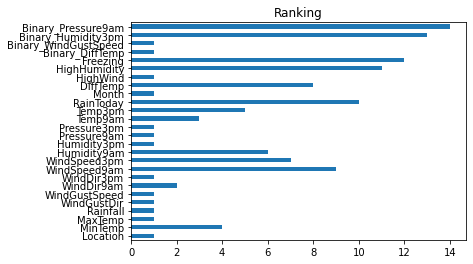

In [ ]:
# OPtimizing XGBoost
from sklearn.feature_selection import RFE
import xgboost as xgb

params_xgb ={'n_estimators': 166,
            'max_depth': 9,
            'learning_rate': 0.08}

estimator = xgb.XGBClassifier(**params_xgb)

wrapper = RFE(estimator, n_features_to_select=13)
x_new = wrapper.fit_transform(x_train, y_train)

print('Sebelum feature selection ', x_train.shape)
print('Setelah feature selection ', x_new.shape)
print('Score of features ', wrapper.ranking_)

feat_importances = pd.Series(wrapper.ranking_, index=x.columns)
feat_importances.plot(kind='barh')
plt.title('Ranking')
plt.show()


In [ ]:

X_train_new = wrapper.transform(x_train)
y_train_np = y_train.to_numpy()

x_test_new = wrapper.transform(x_test)
y_test_np = y_test.to_numpy()


Accuracy test = 0.8232829036153135
Accuracy train = 0.8788242146013909
ROC AUC test = 0.7960202313391015
ROC AUC train = 0.8788242146013909
Cohen's Kappa test = 0.533220139090824
Time taken = 62.43483233451843
              precision    recall  f1-score   support

         0.0    0.92309   0.84436   0.88197     22019
         1.0    0.57253   0.74768   0.64849      6139

    accuracy                        0.82328     28158
   macro avg    0.74781   0.79602   0.76523     28158
weighted avg    0.84666   0.82328   0.83107     28158



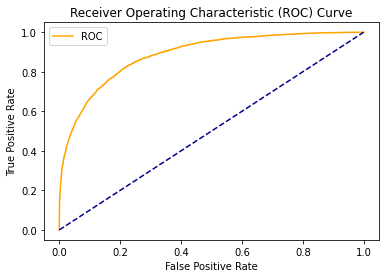

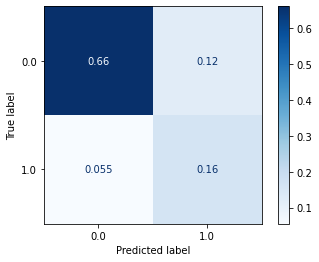

In [ ]:

import xgboost as xgb
params_xgb ={'n_estimators': 166,
            'max_depth': 9,
            'learning_rate': 0.08}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train_new, y_train_np, x_test_new, y_test_np, to_df=True, name='XGBoost Optimized')


In [ ]:
all_metrics

,Model Name,Accuracy(test),Accuracy(train),ROC AUC(test),ROC AUC(train),Precision,Recall,f1,False Positive,False Negative
0,Decision Tree,0.7630,0.7798,0.7507,0.7798,0.4718,0.7288,0.5728,0.1589,0.0591
0,Random Forest,0.7981,0.7902,0.7766,0.7902,0.5264,0.7384,0.6146,0.1610,0.0570
0,XGBoost,0.8303,0.8933,0.8005,0.8933,0.5870,0.7477,0.6577,0.1630,0.0550
0,LGBM,0.8117,0.8192,0.8016,0.8192,0.5476,0.7837,0.6447,0.1709,0.0472
0,LGBM Optimized,0.8011,0.8120,0.7913,0.8120,0.5299,0.7739,0.6291,0.1687,0.0493
0,XGBoost Optimized,0.8233,0.8788,0.7960,0.8788,0.5725,0.7477,0.6485,0.1630,0.0550
